# Data Cleaning

## Method # 01 -                                                                                          
  ## Delete Rows & Columns

In [21]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# load dataset
df = pd.read_csv('goodreads.csv')

In [23]:
df.shape

(214, 31)

In [25]:
#Display first 6 rows
df.head(6)

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,Binding,Number of Pages,Year Published,Original Publication Year,Date Read,Date Added,Bookshelves,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Recommended For,Recommended By,Owned Copies,Original Purchase Date,Original Purchase Location,Condition,Condition Description,BCID
0,13278990,The Housing Monster,prole.info,"prole.info, prole.info",NaN,"=""160486530X""","=""9781604865301""",0,3.77,PM Press,Paperback,160.0,2012.0,2011.0,NaN,2017/12/07,currently-reading,currently-reading (#3),currently-reading,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
1,7805,Pale Fire,Vladimir Nabokov,"Nabokov, Vladimir",NaN,"=""0141185260""","=""9780141185262""",0,4.19,Penguin Books Ltd,Paperback,246.0,2000.0,1962.0,NaN,2013/10/09,to-read,to-read (#26),to-read,NaN,NaN,NaN,0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2,34220725,Never Use Futura,Doug Thomas,"Thomas, Doug",Ellen Lupton,"=""1616895721""","=""9781616895723""",4,4.29,Princeton Architectural Press,Paperback,208.0,2017.0,NaN,NaN,2017/11/12,NaN,NaN,read,Pretty good! It's halfway between a coffee-tab...,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
3,34913288,The Three Pillar Model for Business Decisions:...,George Siedel,"Siedel, George",NaN,"=""""","=""""",4,3.00,"Van Rye Publishing, LLC",Kindle Edition,253.0,2017.0,NaN,2017/11/12,2017/07/09,NaN,NaN,read,The bad: like the other business / sales books...,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
4,11275062,Nixonland: The Rise of a President and the Fra...,Rick Perlstein,"Perlstein, Rick",NaN,"=""1451606265""","=""9781451606263""",5,4.12,Scribner,ebook,896.0,2010.0,2008.0,2017/11/11,2017/10/01,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
5,27162486,The Banjo: America's African Instrument,Laurent Dubois,"Dubois, Laurent",NaN,"=""0674047842""","=""9780674047846""",5,4.39,Belknap Press: An Imprint of Harvard Universit...,Hardcover,384.0,2016.0,2016.0,NaN,2017/11/07,NaN,NaN,read,NaN,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN


In [26]:
#Display all rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [27]:
# information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Book Id                     214 non-null    int64  
 1   Title                       214 non-null    object 
 2   Author                      214 non-null    object 
 3   Author l-f                  214 non-null    object 
 4   Additional Authors          58 non-null     object 
 5   ISBN                        214 non-null    object 
 6   ISBN13                      214 non-null    object 
 7   My Rating                   214 non-null    int64  
 8   Average Rating              214 non-null    float64
 9   Publisher                   209 non-null    object 
 10  Binding                     212 non-null    object 
 11  Number of Pages             209 non-null    float64
 12  Year Published              208 non-null    float64
 13  Original Publication Year   209 non

<AxesSubplot:>

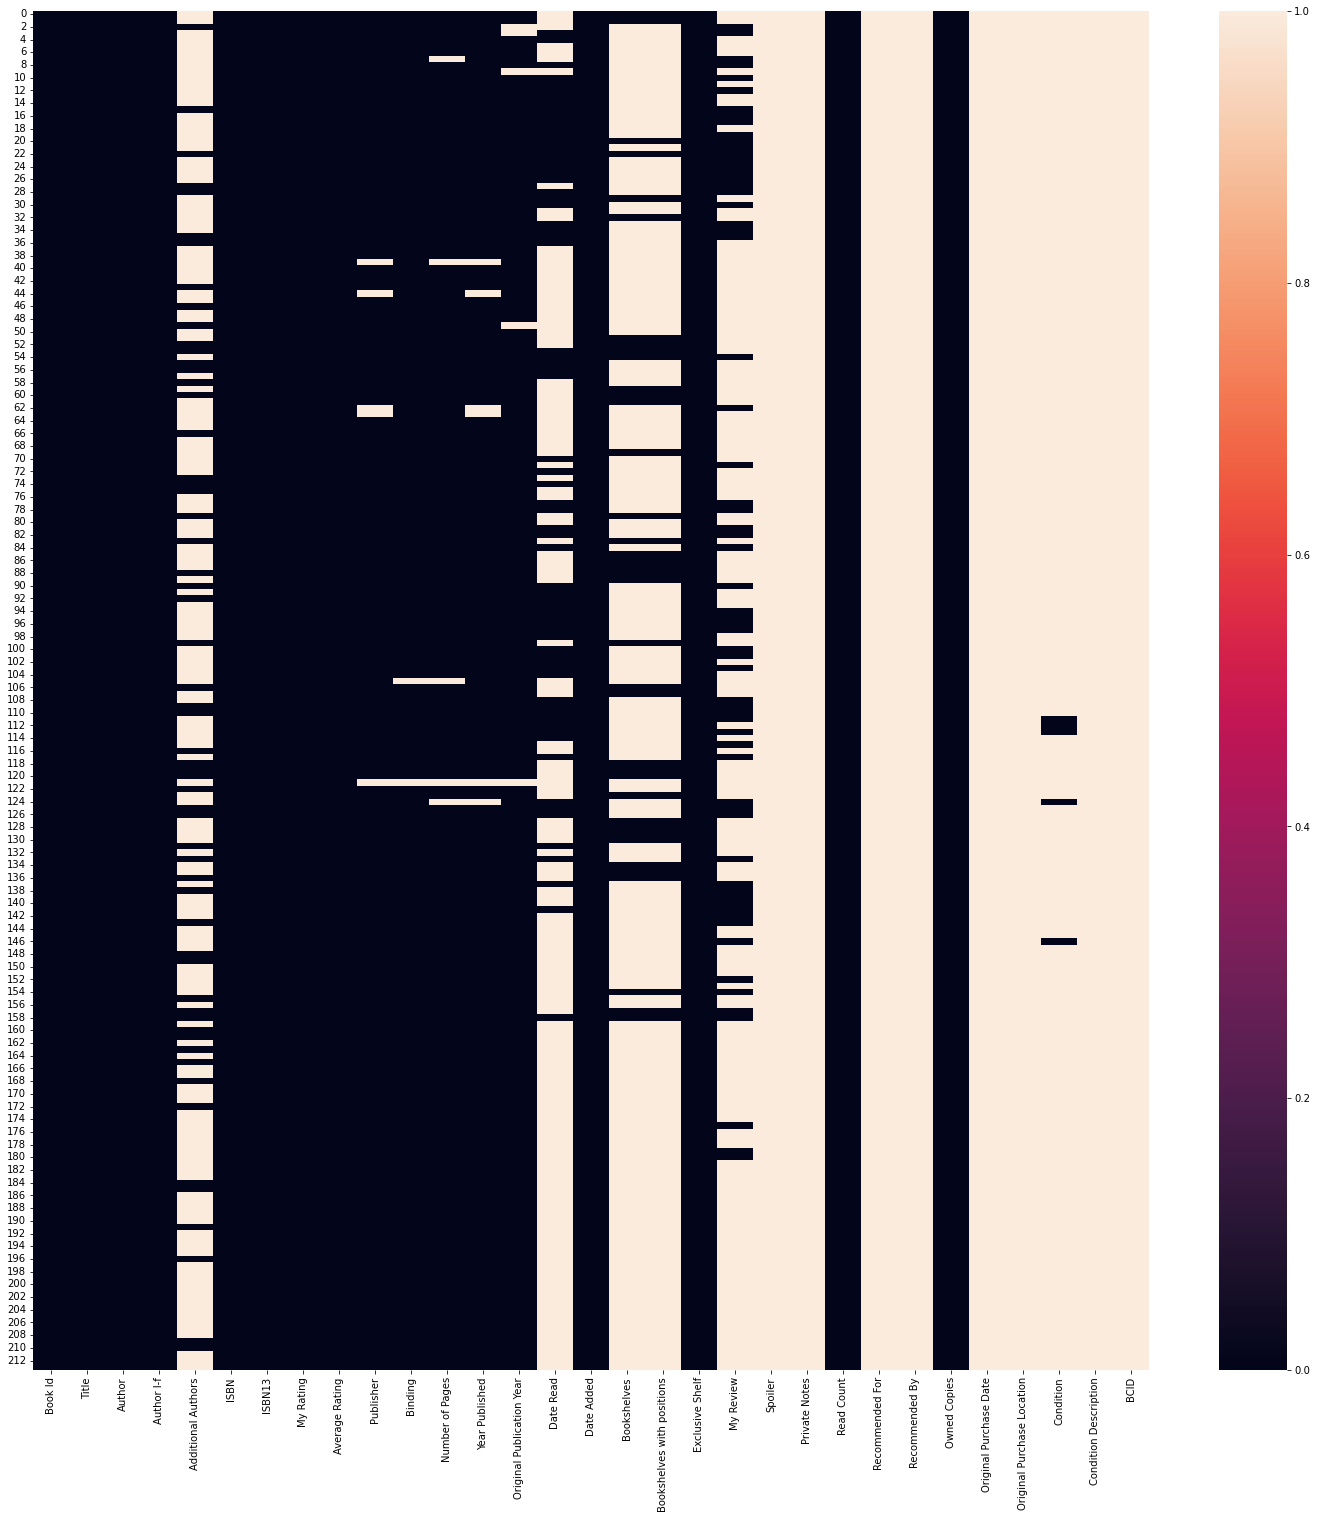

In [28]:

plt.figure(figsize=(25,25))
#Heatmap using seaborn to show null values
sns.heatmap(df.isnull())

In [29]:
#check the percentage of missing values in each column
null_var = df.isnull().sum()/df.shape[0] *100
null_var

Book Id                         0.000000
Title                           0.000000
Author                          0.000000
Author l-f                      0.000000
Additional Authors             72.897196
ISBN                            0.000000
ISBN13                          0.000000
My Rating                       0.000000
Average Rating                  0.000000
Publisher                       2.336449
Binding                         0.934579
Number of Pages                 2.336449
Year Published                  2.803738
Original Publication Year       2.336449
Date Read                      67.289720
Date Added                      0.000000
Bookshelves                    82.242991
Bookshelves with positions     82.242991
Exclusive Shelf                 0.000000
My Review                      69.626168
Spoiler                       100.000000
Private Notes                 100.000000
Read Count                      0.000000
Recommended For               100.000000
Recommended By  

In [31]:
#Select the columns which have null values more than 17%
drop_columns  = null_var[null_var >17].keys()
#show columns
drop_columns

Index(['Additional Authors', 'Date Read', 'Bookshelves',
       'Bookshelves with positions', 'My Review', 'Spoiler', 'Private Notes',
       'Recommended For', 'Recommended By', 'Original Purchase Date',
       'Original Purchase Location', 'Condition', 'Condition Description',
       'BCID'],
      dtype='object')

In [32]:
# Drop null columns from df and assing the value to new data frame
df2_drop_clm=df.drop(columns=drop_columns)

In [34]:
df2_drop_clm.shape

(214, 17)

<AxesSubplot:>

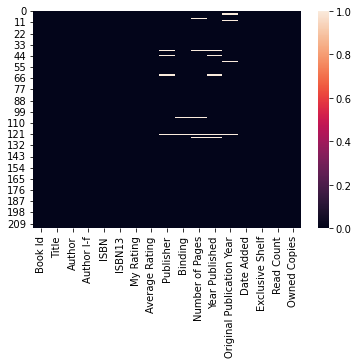

In [35]:
#heatmap of null values in new dataframe
sns.heatmap(df2_drop_clm.isnull())

In [37]:
# If any NA values are present in any row or column, drop that row or colum
df3_drop_rows = df2_drop_clm.dropna()

In [38]:
df3_drop_rows.shape

(202, 17)

<AxesSubplot:>

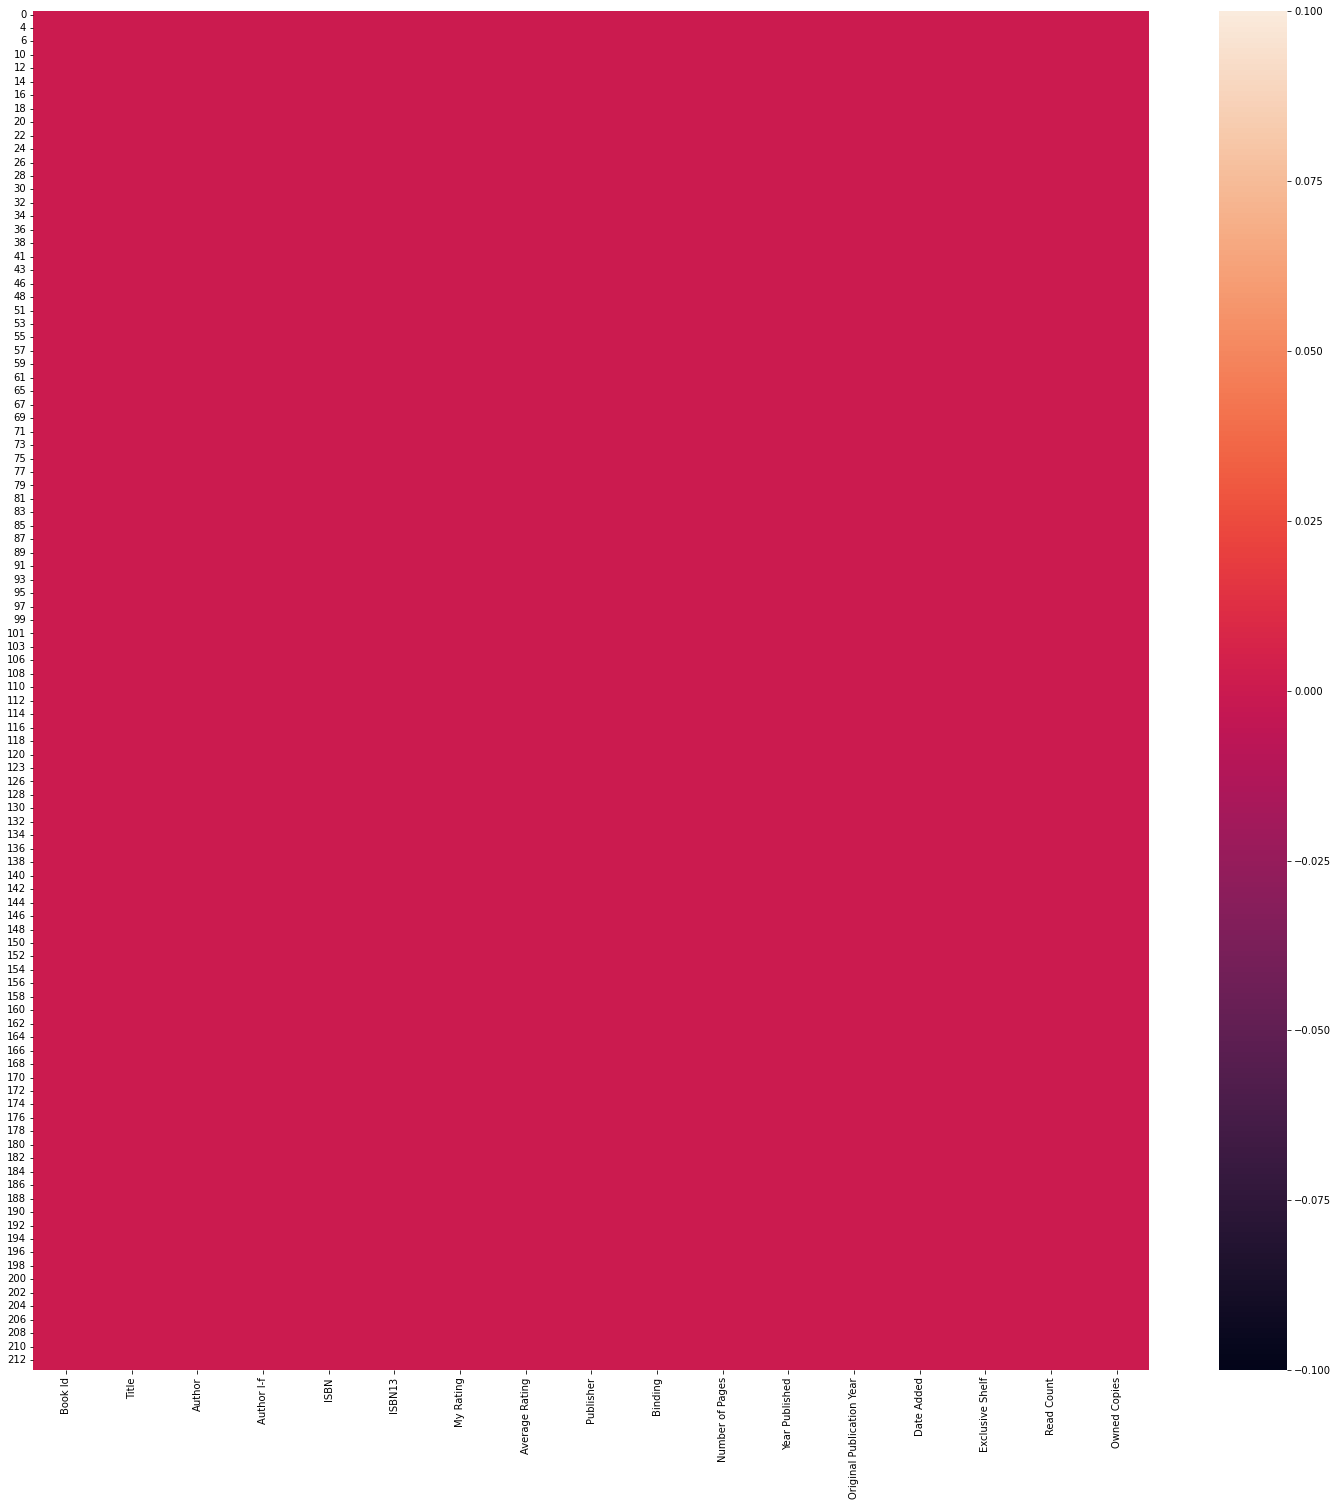

In [39]:
plt.figure(figsize=(25,25))
sns.heatmap(df3_drop_rows.isnull())

In [40]:
#check how many null values are present in whole dataframe
df3_drop_rows.isnull().sum().sum()

0

In [41]:
#Select only "int64" and "Float64" data columns
df3_drop_rows.select_dtypes(include=['int64','float64']).columns

Index(['Book Id', 'My Rating', 'Average Rating', 'Number of Pages',
       'Year Published', 'Original Publication Year', 'Read Count',
       'Owned Copies'],
      dtype='object')

<AxesSubplot:xlabel='Average Rating', ylabel='Density'>

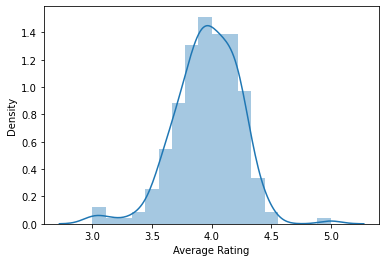

In [51]:
# Seaborn Distplot can only works on Numeric data

sns.distplot(df['Average Rating'])

E:\Anaconda Installed\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Rating', ylabel='Density'>

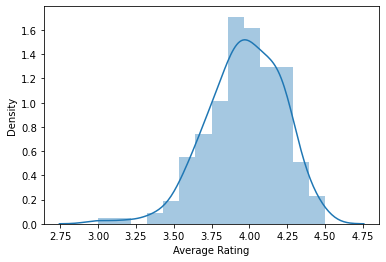

In [52]:
sns.distplot(df3_drop_rows['Average Rating'])

E:\Anaconda Installed\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda Installed\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Average Rating', ylabel='Density'>

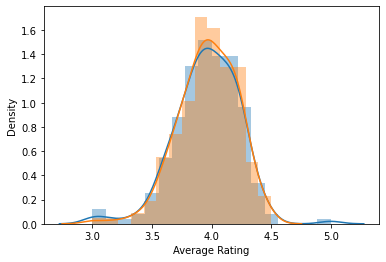

In [53]:
#check the data distributaion difference between old and new dataframe
sns.distplot(df['Average Rating'])
sns.distplot(df3_drop_rows['Average Rating'])

E:\Anaconda Installed\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda Installed\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda Installed\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

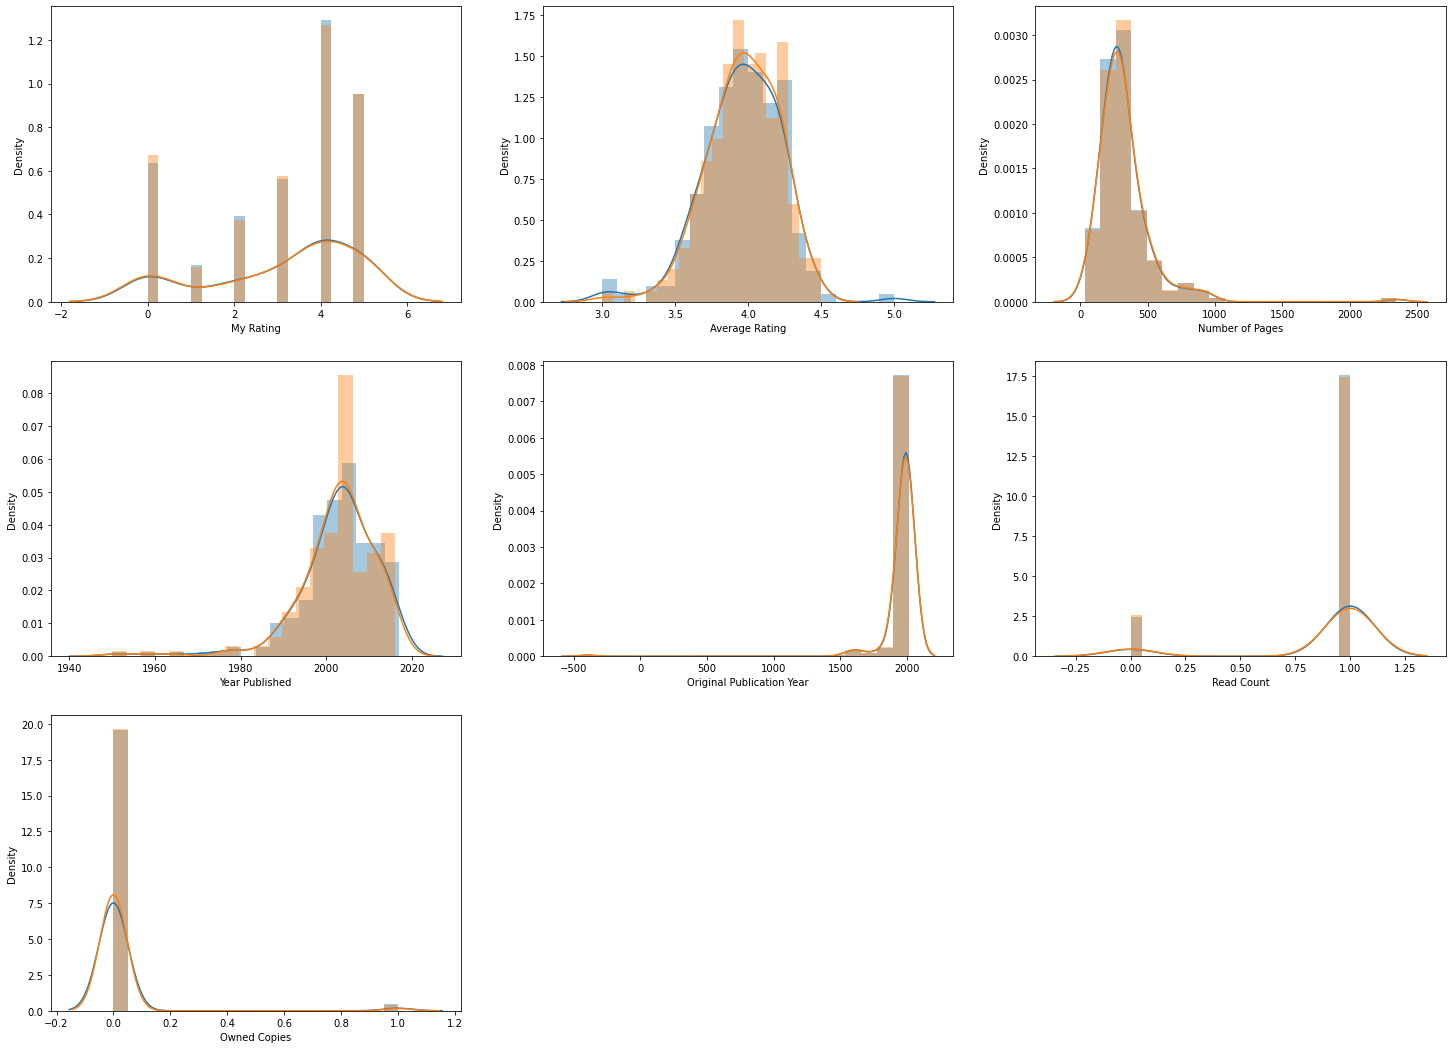

In [56]:
# Check the Data Distribution of All numeric Columns

# Store All numeric columns in a list
num_var =['My Rating', 'Average Rating', 'Number of Pages',
       'Year Published', 'Original Publication Year', 'Read Count',
       'Owned Copies']

plt.figure(figsize=(25,25))       

# Enumerate gives index and value both
for i,var in enumerate(num_var):
# Draw subplot using matplotlib
    plt.subplot(4,3,i+1)
    sns.distplot(df[var], bins=20)
    sns.distplot(df3_drop_rows[var], bins=20)

In [90]:
#Now select columns with Object DataTypes
# Select Catagorical Variables
df3_drop_rows.select_dtypes(include=['object']).columns

Index(['Title', 'Author', 'Author l-f', 'ISBN', 'ISBN13', 'Publisher',
       'Binding', 'Date Added', 'Exclusive Shelf'],
      dtype='object')

In [75]:
# Count All the Categories present in Publisher Column
df['Publisher'].value_counts()

Vintage                                                  9
Basic Books                                              7
Back Bay Books                                           5
Farrar, Straus and Giroux                                5
Knopf                                                    4
Pantheon                                                 4
W. W. Norton  Company                                    4
Penguin Books                                            4
Penguin Classics                                         4
Oxford University Press                                  3
Pocket Books                                             3
Dial Press                                               3
Byron Crawford                                           3
Harper Perennial                                         3
Cambridge University Press                               3
Oxford University Press, USA                             3
Scribner                                                

In [110]:
#Check the data Distribution of Categorical Variable
pd.concat([df['Publisher'].value_counts()/df.shape[0] * 100, 
          df3_drop_rows['Publisher'].value_counts()/df3_drop_rows.shape[0] * 100], axis=1,
         keys=['Publisher_orginal', 'Publisher_clean'])

,Publisher_orginal,Publisher_clean
Vintage,4.205607,4.455446
Basic Books,3.271028,3.465347
Back Bay Books,2.336449,2.475248
"Farrar, Straus and Giroux",2.336449,2.475248
Knopf,1.869159,1.980198
Pantheon,1.869159,1.980198
W. W. Norton Company,1.869159,1.980198
Penguin Books,1.869159,1.980198
Penguin Classics,1.869159,1.980198
Oxford University Press,1.401869,1.485149


In [97]:
Categorical_variables = ['Title', 'Author', 'Author l-f', 'ISBN', 'ISBN13', 'Publisher',
       'Binding', 'Date Added', 'Exclusive Shelf']

In [111]:
#Check the data Distribution of all Categorical Variables

for index , value in enumerate(Categorical_variables):
    
    data = pd.concat([df[value].value_counts()/df.shape[0] * 100, 
          df3_drop_rows[value].value_counts()/df3_drop_rows.shape[0] * 100],axis = 1,
         keys=[value+'_org', value+'_clean'])
    i+=1
    print(data)


                                                    Title_org  Title_clean
Infinite Crab Meats                                  0.934579     0.990099
The Housing Monster                                  0.467290     0.495050
The Kite Runner                                      0.467290     0.495050
A History of God: The 4,000-Year Quest of Judai...   0.467290     0.495050
Sixty Stories                                        0.467290     0.495050
White Noise                                          0.467290     0.495050
Augustine: A New Biography                           0.467290     0.495050
Evil: An Investigation                               0.467290     0.495050
Digital Fortress                                     0.467290     0.495050
The Bhagavad Gita                                    0.467290     0.495050
Meatball Sundae: Is Your Marketing Out of Sync?      0.467290     0.495050
The Jazz Theory Book                                 0.467290     0.495050
The Southern Baptists: A 

In [78]:
cat_var_dist('Exclusive Shelf')

,Exclusive Shelf_org,Exclusive Shelfclean
read,86.448598,85.643564
to-read,12.149533,12.871287
currently-reading,1.401869,1.485149


In [1]:
print("Thank You.....-:)")

Thank You.....-:)
